# Transcription of the best notebook

In [1]:
import os
#pylab은 matplotlib 설치시 같이 설치되는 모듈 중 하나이며 Pyplot과 numpy를 하나의 네임스페이스에 임포트시킨다.
#하지만 네임스페이스를 오염시킬 우려가 크기 때문에 앞으로 사라질 듯한 모듈이다.
import pylab
#달력을 볼 수 있는 모듈. calendar,prcal,prmonth,weekday 등 다양한 함수 존재
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
# scipy는 수치해석기능을 제공하는 패키지.
# 그중에서도 stats 서브패키지는 확률분포 분석을 위한 다양한 기능 제공
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
# chained indexing으로 인한 경고를 모두 무시하겠다.
pd.options.mode.chained_assignment = None
warnings.filterwarnings(action='ignore')

In [2]:
os.chdir('/Users/younghun/Desktop/gitrepo/data')

In [3]:
dailyData =  pd.read_csv('bike_train.csv', encoding='utf-8')
dailyData.shape

(10886, 12)

## Data summary

- 데이터 크기 살펴보기
- 데이터 몇 rows 미리보기
- 변수들의 dtype 살펴보기

In [4]:
dailyData.shape

(10886, 12)

In [5]:
dailyData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
dailyData.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## Feature Engineering

- 원본 데이터의 season, holiday, workingday, weather 변수 타입들이 int형인데 이를 EDA를 위해 Categorical로 바꾸어 주자

- datetime 칼럼으로부터 date, hour, weekday, month 추출하고 datetime 칼럼 삭제
- season, holiday, workingday, weather 칼럼 강제로 범주형변수로 바꿔주기


In [7]:
dailyData['datetime'] = pd.to_datetime(dailyData['datetime'])

In [8]:
season_dict = {1:'Spring', 2:'Sumeer',3:'Fall',4:'Winter'}
weather_dict = {1:'Clear, Few clouds, Partly cloudy, Partly cloudy',
               2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
               3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
               4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}

In [9]:
dailyData['date'] = dailyData['datetime'].dt.date
dailyData['hour'] = dailyData['datetime'].dt.hour
dailyData['weekday'] = dailyData['datetime'].dt.weekday
dailyData['month'] = dailyData['datetime'].dt.month
dailyData['season'] = dailyData.season.map(season_dict)
dailyData['weather'] = dailyData.weather.map(weather_dict)

In [10]:
# 반복되는 value들이 많으면 cateogry타입을 사용하는 것이 훨씬 더 속도가 빨라짐
# object는 반복되는 value들이 거의 없을 때 사용!

# Categorical type으로 바꿔주기
category_lst = ['hour','weekday','month','season',
               'weather','holiday','workingday']
for var in category_lst:
    dailyData[var] = dailyData[var].astype('category')

In [11]:
# datetime 칼럼 삭제해주기
del dailyData['datetime']

## Handling missing values

<AxesSubplot:>

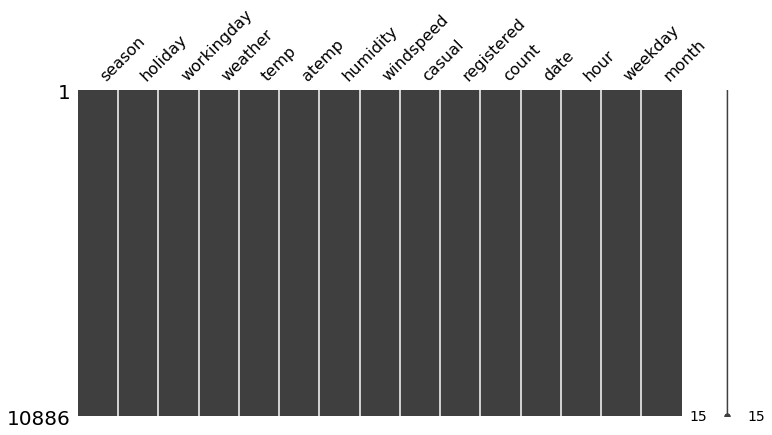

In [12]:
# missingno 를 이용해서 결측치 시각화해보기
msno.matrix(dailyData, figsize=(12,6))

## Checking outliers

In [13]:
dailyData.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [14]:
dailyData.describe(include='category')

,season,holiday,workingday,weather,hour,weekday,month
count,10886,10886,10886,10886,10886,10886,10886
unique,4,2,2,4,24,7,12
top,Winter,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",23,5,12
freq,2734,10575,7412,7192,456,1584,912


(array([3426., 1703., 1492., 1183.,  891.,  679.,  450.,  360.,  249.,
         161.,  120.,   68.,   61.,   36.,    7.]),
 array([  1.        ,  66.06666667, 131.13333333, 196.2       ,
        261.26666667, 326.33333333, 391.4       , 456.46666667,
        521.53333333, 586.6       , 651.66666667, 716.73333333,
        781.8       , 846.86666667, 911.93333333, 977.        ]),
 <BarContainer object of 15 artists>)

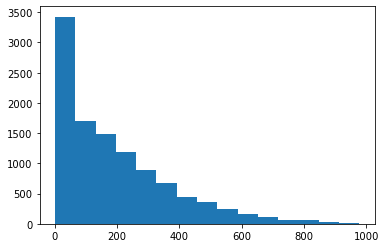

In [15]:
# y값인 count 종속변수가 매우 편향된 분포를 띄고 있다. 
# 정규분포화시켜야할 필요가 있음
plt.hist(dailyData['count'], bins=15)

<AxesSubplot:xlabel='workingday', ylabel='count'>

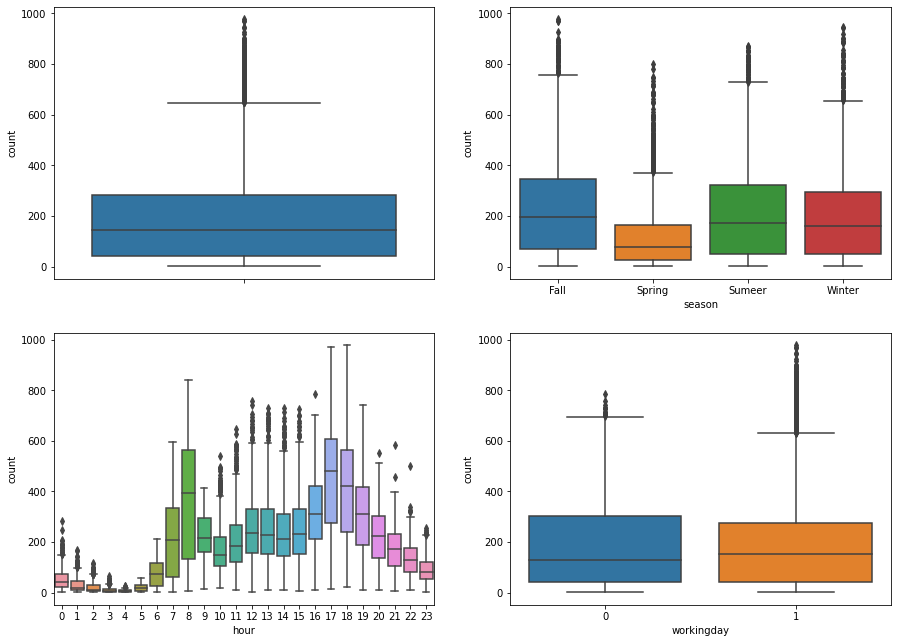

In [16]:
# boxplot으로 다른 변수들도 이상치 탐지해보기
fig, axes = plt.subplots(figsize=(15,11), nrows=2, ncols=2)
# 종속변수인 count 변수 boxplot
sns.boxplot(data=dailyData, y='count', orient='v', ax=axes[0][0])
# 계절변수 boxplot
sns.boxplot(data=dailyData, y='count', x='season', orient='v',
           ax=axes[0][1])
# 시간대 변수 boxplot
sns.boxplot(data=dailyData, y='count', x='hour', orient='v',
           ax=axes[1][0])
# 영업일 여부 변수에 따른 boxplot
sns.boxplot(data=dailyData, y='count', x='workingday', orient='v',
           ax=axes[1][1])

In [17]:
# count 종속변수에서 이상치 제거하는 함수 만들어주기
def remove_outliers(df, column):
    quartile3 = np.percentile(df[column], 75)
    quartile1 = np.percentile(df[column], 25)
    iqr = quartile3 - quartile1
    lowest = quartile1 - (1.5*iqr)
    highest = quartile3 + (1.5*iqr)
    outlier_idx = df[(df[column] < lowest)|(df[column] > highest)].index
    df = df.drop(outlier_idx, axis=0)
    return df

In [18]:
dailyDataWithoutOutliers = remove_outliers(dailyData, 'count')

In [19]:
print("Original shape :", dailyData.shape)
print("After removing outliers, shape :", dailyDataWithoutOutliers.shape)

Original shape : (10886, 15)
After removing outliers, shape : (10586, 15)


## Correlation analysis

In [20]:
# 종속변수에 영향을 미치는 독립변수들 살펴보기 위해 상관관계 matrix 그려보기
# temp와 atemp(온도와 체감온도)는 강한 상관관계를 갖기 때문에 다중공산성을 예방하기 위해서 나중에 둘 중 하나는 제거해야 함!
# Casual과 Registered 변수들은 추후에 모델이 상용화 될 시 이변수들을 갖고 학습하고 예측하지 않기 때문에 data leakage(외부 데이터를 갖고와 학습)를 예방하기 위해 이 변수들은 학습시 넣어주면 안됨!
corr_df = dailyData[['temp','atemp','casual','registered',
                    'humidity','windspeed','count']].corr()
array_corr_df = np.array(corr_df)
# Lower Triangle Matrix로 만들어주기 추후에 mask인자에 넣어주어야 함!
# mask인자는 결측치가 자동으로 masking되어서 나타남
array_corr_df[np.tril_indices_from(array_corr_df)] = False

<AxesSubplot:>

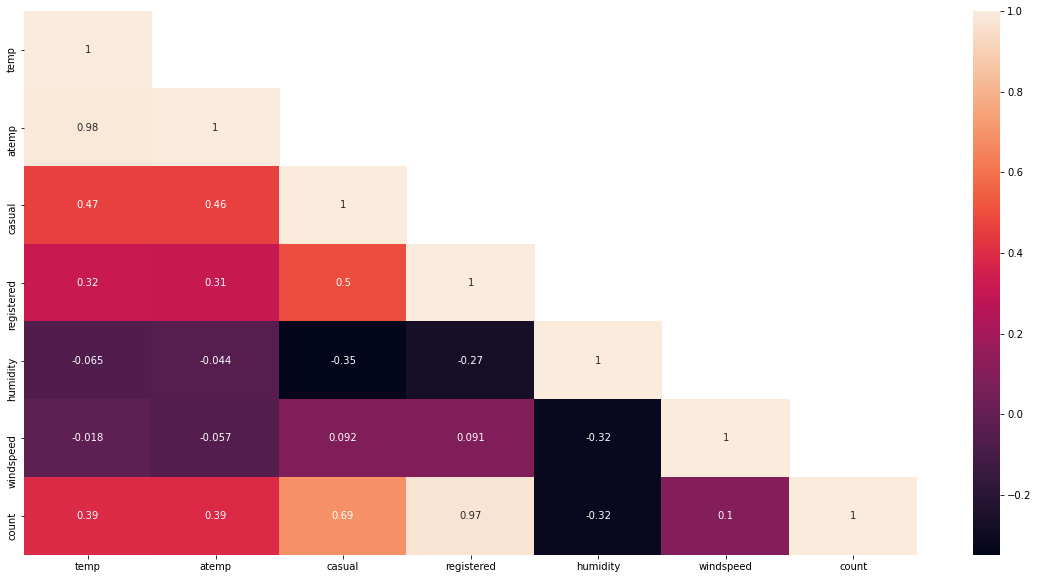

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr_df, mask=array_corr_df, annot=True)

<AxesSubplot:xlabel='humidity', ylabel='count'>

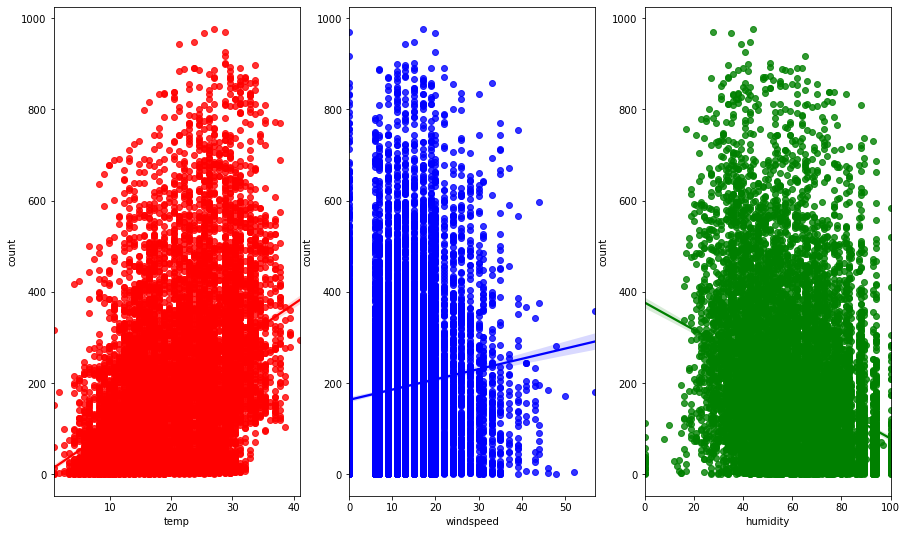

In [22]:
# temp, windspeed, humidity와 count의 각각 상관관계 살펴보기
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15,9), ncols=3)
sns.regplot(data=dailyData, x='temp', y='count', ax=ax1, 
            color='red')
sns.regplot(data=dailyData, x='windspeed', y='count', ax=ax2,
           color='blue')
sns.regplot(data=dailyData, x='humidity', y='count', ax=ax3,
           color='green')

((array([-3.82466286, -3.60029062, -3.47714484, ...,  3.47714484,
          3.60029062,  3.82466286]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.4738907 , 6.4738907 ,
         6.4738907 ])),
 (1.3360452062579258, 4.533937141246246, 0.9559941217256338))

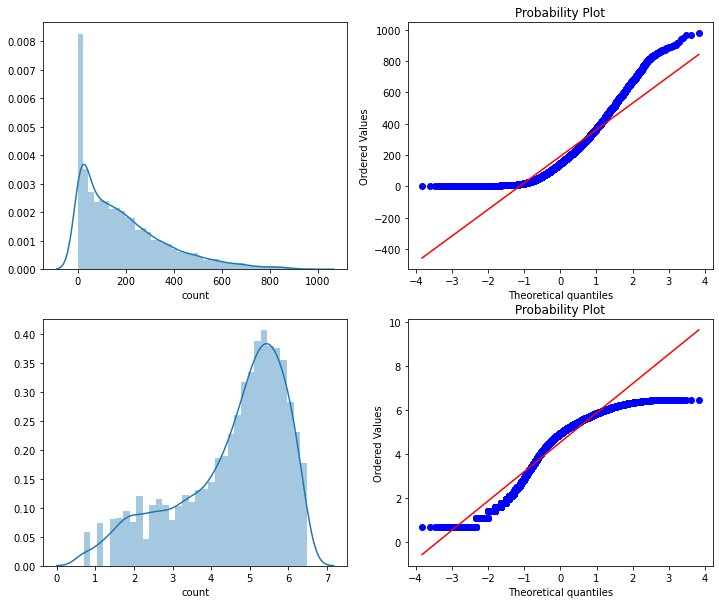

In [23]:
# 머신러닝 알고리즘은 주로 feature뿐만 아니라 종속변수들의 정규분포를 가정한다.
# 따라서 log변환을 해주어서 정규분포화 시키기
fig, axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(12, 10)

# count에 대한 분포보기
sns.distplot(dailyData['count'], ax=axes[0][0])
# QQplot 그리기
stats.probplot(dailyData['count'], dist='norm',
              fit=True, plot=axes[0][1])
# 이상치를 제거한 count에 log 취한 후 분포그리기
sns.distplot(np.log1p(dailyDataWithoutOutliers['count']),
            ax=axes[1][0])
# 이상치를 제거한 count에 log를 취한 후 QQ-plot 그리기
stats.probplot(np.log1p(dailyDataWithoutOutliers['count']),
              dist='norm', fit=True, plot=axes[1][1])

In [24]:
month_dict = {1:'January',2:'February',3:'March',4:'April',
             5:'May',6:'June',7:'July',8:'August',9:'September',
             10:'October',11:'November',12:'December'}

weekday_dict = {0:'Monday',1:'Tuesday',2:'Wednesday',
               3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

dailyData['month'] = dailyData['month'].map(month_dict)
dailyData['weekday'] = dailyData['weekday'].map(weekday_dict)
dailyData.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,Spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,81,0.0,3,13,16,2011-01-01,0,Saturday,January
1,Spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,8,32,40,2011-01-01,1,Saturday,January
2,Spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,5,27,32,2011-01-01,2,Saturday,January


``reshape해주는 pandas의 melt 애용해보자!!!``

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

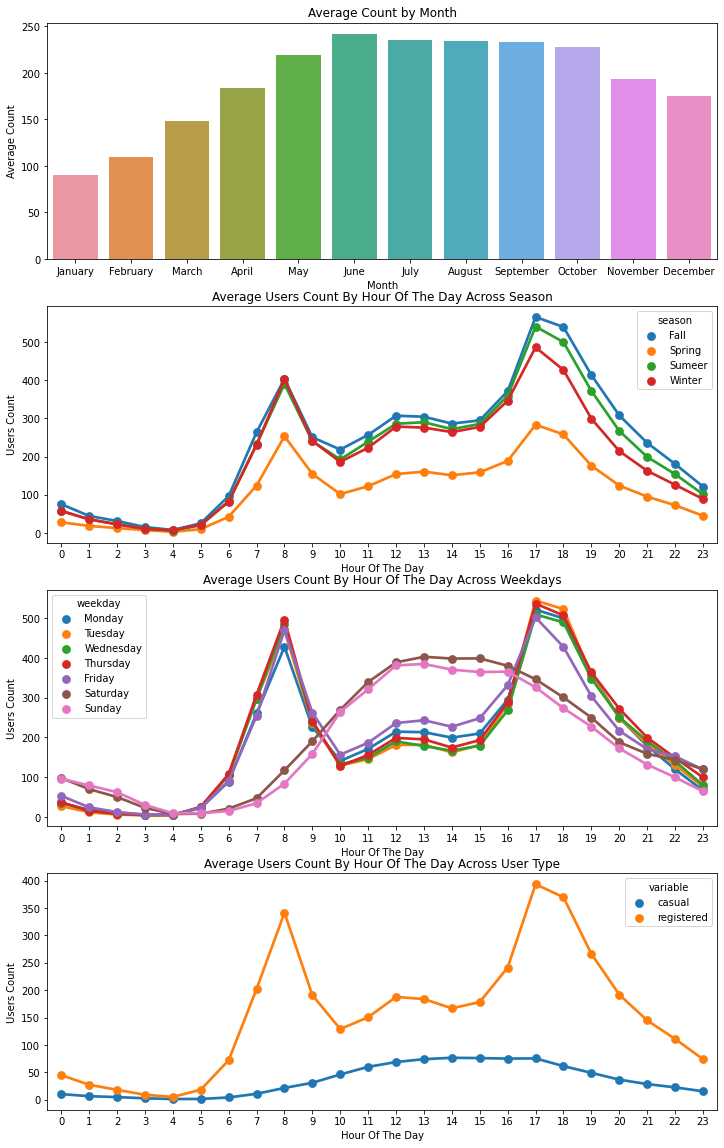

In [39]:
# 월별,계졀별, 시간별, 주말, 사용자유형에 따라 count 시각화

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April",
             "May","June","July","August","September","October",
             "November","December"]

hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday",
            "Friday","Saturday"]

month_agg = pd.DataFrame(dailyData.groupby('month')['count'].mean()).reset_index()
month_sort = month_agg.sort_values(by='count',
                                  ascending=False)
sns.barplot(data=month_sort, x='month', y='count',
           ax=ax1, order=sortOrder)
ax1.set(xlabel='Month', ylabel='Average Count',
       title='Average Count by Month')
# 그룹핑 변수안에 sort넣어서 정렬할 수 있음.
hour_agg = pd.DataFrame(dailyData.groupby(['hour','season'],
                                         sort=True)['count'].mean()).reset_index()
# join=True로 point간에 선으로 연결가능
sns.pointplot(x=hour_agg['hour'], y=hour_agg['count'],
             hue=hour_agg['season'], join=True, ax=ax2,
             data=hour_agg)
ax2.set(xlabel='Hour Of The Day',
        ylabel='Users Count',
        title="Average Users Count By Hour Of The Day Across Season")

hour_agg = pd.DataFrame(dailyData.groupby(['hour','weekday'],
                                         sort=True)['count'].mean()).reset_index()
sns.pointplot(x=hour_agg['hour'], y=hour_agg['count'],
             hue=hour_agg['weekday'], join=True, ax=ax3,
             data=hour_agg)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

# casual, registered를 변수의 값으로 넣어 시각화(melt사용)
# id_vars를 기준으로 casual, registered값들 해당하는 값들 만들기
hour_transformed = pd.melt(dailyData[['hour','casual','registered']],
       id_vars=['hour'], value_vars=['casual','registered'])
hour_agg = pd.DataFrame(hour_transformed.groupby(['hour','variable'],
                                                sort=True)['value'].mean()).reset_index()
sns.pointplot(x=hour_agg['hour'], y=hour_agg['value'],
             hue=hour_agg['variable'], join=True, ax=ax4,
             data=hour_agg)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

## Filling missing values using RandomForest

In [44]:
train = pd.read_csv('bike_train.csv', encoding='utf-8')
test = pd.read_csv('bike_test.csv', encoding='utf-8')

# train, test 데이터 결합
# append는 데이터프레임을 데이터프레임에 행으로 추가할 때도 사용
data = train.append(test)
data = data.reset_index()
del data['index']
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [45]:
# 'datetime' feature engineering
dailyData = data.copy()
dailyData['datetime'] = pd.to_datetime(dailyData['datetime'])
dailyData['date'] = dailyData['datetime'].dt.date
dailyData['hour'] = dailyData['datetime'].dt.hour
dailyData['weekday'] = dailyData['datetime'].dt.weekday
dailyData['month'] = dailyData['datetime'].dt.month
dailyData['year'] = dailyData['datetime'].dt.year
dailyData.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,0,5,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,1,5,1,2011


- windspeed 값이 0이 아닌 데이터를 이용해 머신러닝 모델을 학습시키고 이 모델로 windspeed값이 0인 데이터들의 feature를 활용해 windspeed값 예측해보기

In [46]:
# RandomForest 사용해서 windspeed 0값 적절히 채워주기.
# 결측치 값 종류가 연속형이기 때문에 Regressor 활용
from sklearn.ensemble import RandomForestRegressor
data = dailyData.copy()
miss_wind = data[data['windspeed']==0]
no_miss_wind = data[data['windspeed']!=0]

# feature정의
features = ['season','weather','humidity','month','temp',
           'year','atemp']
# windspeed가 0이 아닌 데이터들로 모델 학습
rf_reg = RandomForestRegressor()
rf_reg.fit(no_miss_wind[features], no_miss_wind['windspeed'])
# 학습시킨 모델로 windspeed 예측
pred_wind = rf_reg.predict(miss_wind[features])
# windspeed의 예측값을 windspeed 0인값을 대체
miss_wind['windspeed'] = pred_wind
# 다시 두 개의 데이터프레임 결합
data = no_miss_wind.append(miss_wind)
data = data.reset_index()
del data['index']

In [48]:
# windspeed=0인 데이터 여전히 있는지 확인
data[data['windspeed'] ==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month,year


In [49]:
categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]
dropFeatures = ['casual',"count","datetime","date","registered"]

In [50]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype('category')

In [52]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month,year
0,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0.0,1.0,1.0,2011-01-01,5,5,1,2011
1,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12.0,24.0,36.0,2011-01-01,10,5,1,2011
2,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26.0,30.0,56.0,2011-01-01,11,5,1,2011
3,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29.0,55.0,84.0,2011-01-01,12,5,1,2011
4,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47.0,47.0,94.0,2011-01-01,13,5,1,2011


In [59]:
# split train and test
# count가 결측치인 값이 test 데이터임!
dataTrain = data[data['count'].notnull()].sort_values(by='datetime')
dataTest = data[~data['count'].notnull()].sort_values(by='datetime')

datetimecol = dataTest['datetime']
yLabels = dataTrain['count']
yLabelsRegistered = dataTrain['registered']
yLabelsCasual = dataTrain['casual']

dataTrain = dataTrain.drop(dropFeatures, axis=1)
dataTest = dataTest.drop(dropFeatures, axis=1)

In [ ]:
# RMSE score 부터- sklearn이용해도되지않나!?
